# Свёртка и свёрточные нейронные сети

## Свёртка

<b>Свёртка</b> — операция в функциональном анализе, которая при применении к двум функциям $f$ и $g$ возвращает третью функцию, соответствующую взаимнокорреляционной функции $f(x)$ и $g(-x)$. Операцию свёртки можно интерпретировать как «схожесть» одной функции с отражённой и сдвинутой копией другой.

### Одномерная свёртка

Подобно кросскорреляции, свёртка может быть использована для анализа сходства двух сигналов с разными запаздываниями.  

Существует множество применений свертки. Она особенно популярна в обработке изображений и машинном зрении, где свертка используется для обнаружения (подчёркивания) границ и подобных приложений. Свертка входного сигнала и импульсного отклика дает на выходе линейную инвариантную во времени систему. Это делает ее очень распространенной операцией в электротехнике. Ниже показана свёртка треугольного и прямоугольного импульса.

![SegmentLocal](images/1dconvolution.gif "segment")

Свёртка определяется как интеграл произведения двух сигналов (функций), где один из сигналов обращен во времени. Она тесно связана с кросс-корреляцией. Фактически, это кросс-корреляция после того, как один из сигналов был изменен на противоположный.

Определение довольно простое, вы накладываете два сигнала с заданной задержкой и коррелируете с запаздывающим сигналом в обратном порядке. То есть, один из сигналов меняется на противоположный.

В общем случае, свёртка определена так:

$$(f * g)(t) = f(x) * g (x, t) $$

$$(f * g)(t) = \int\limits_{-\infty}^\infty f(x)g(t-x)dx $$

Математическая запись для случая дискретных сигналов:

$$(f * g)[n] = \sum\limits_{k\to-\infty}^\infty f[k] \cdot g[n-k] $$

Свёртку ещё часто записывают в виде интегрального преобразования с некоторым ядром (kernel) $K$:
$$(\mathrm{T} f)(t) = \int\limits_{-\infty}^\infty f(x)K(t, x)dx $$


Рассмотрим примеры реализации свёрток

In [ ]:
def sig_square(x):
  return 0 if x < 3 or x > 5 else 2

def sig_triag(x):
  return 0 if x < 0 or x > 2 else x

# Первый сигнал: прямоугольный импульс
sig1 = [sig_square(x/100) for x in range(1000)]

# Второй сигнал: треугольный импульс
sig2 = [sig_triag(x/100) for x in range(200)]

Реализация на "чистом" Python может выглядеть так:

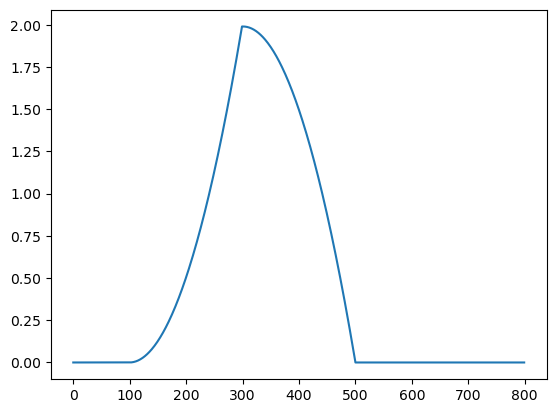

In [ ]:
import matplotlib.pyplot as plt

# Здесь будет результат
conv = (len(sig1) - len(sig2)) * [0]

# Проходим по всем запаздывающим компонентам
for l in range(len(conv)):
  for i in range(len(sig2)):
    conv[l] += sig1[l-i+len(sig2)] * sig2[i]

# Нормализуем результат
  conv[l] /= len(sig2)

plt.plot(conv)

Все популярные математические библиотеки (в том числе, NumPy и SciPy) имеют функции для реализации свёртки, поэтому писать циклы не нужно! (К тому же, векторизованные варианты быстрее)

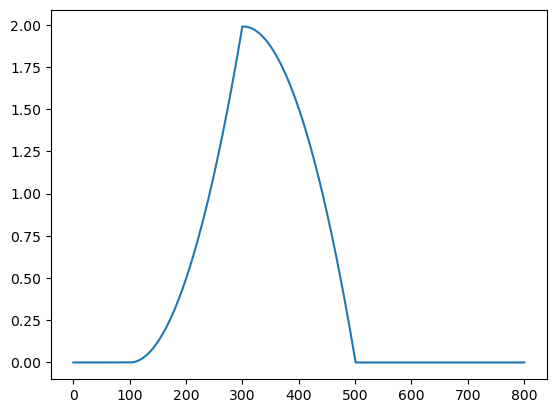

In [ ]:
import numpy as np

# Свернули
conv = np.convolve(sig1, sig2, mode='valid')

# Нормализовали
conv /= len(sig2)

# Нарисовали
plt.plot(conv)

В связи с тем, что один из сигналов берётся с лагом, существует 3 типа операций свёртки:
1. С дополнением (padding), полная (full)
2. С дополнением (padding), идентичная (same)
3. Без дополнения, "правильная" (valid)

<b>1. Cвёртка с полным дополнением (padding, full).</b>
При вычислении свёртки исходный сигнал дополняется по краям необходимым количеством нулей. В этом случае результат будет большим по размеру, чем исходный сигнал

In [ ]:
import numpy as np

x = [6, 2]
h = [1, 2, 5, 4]

y = np.convolve(x, h, "full")
y

array([ 6, 14, 34, 34,  8])

<b>2. Cвёртка с "идентичным" дополнением (padding, same).</b> При вычислении свёртки сигнал дополняется только с одной стороны нулями. Свойство этого варианта свёртки: сигнал на выходе будет иметь размер аналогичный сигналу на входе.

In [ ]:
import numpy as np

x = [6, 2]
h = [1, 2, 5, 4]

y = np.convolve(x, h, "same")
y

array([ 6, 14, 34, 34])

<b>3. "Правильная" свёртка, без дополнения.</b> При вычислении свёртки сигнал никак не дополняется, вычисления производятся только тогда, когда есть все данные, так что искажения не вносятся. Однако, выходной сигнал будет обрезан.

In [ ]:
import numpy as np

x = [6, 2]
h = [1, 2, 5, 4]

y = np.convolve(x, h, "valid")
y

array([14, 34, 34])

Одномерная свёртка может применяться для:
* фильтрации
* детектирования сигналов
* анализа временных рядов

### Двумерная свёртка

Двумерная свётрка имеет те же свойства и определение, что и одномерная, но для случая двумерных сигналов. Самые распространённые двумерные сигналы - это изображения.

Существуют и используются те же самые типы свёртки, что и в одномерном случае (full, same, valid).

Пусть дано полутоновое изображение, определённое матрицей яркостей пикселей $I$. Тогда двумерная дискретная свёртка изображения $I$ и фильтра $g$ будет задано следующим образом:

<font size="4">$$ I'= \sum\limits_{u,v} I(x-u,y-v)g(u,v) $$ </font>


Рассмотрим на примере применение свёртки к матрице изображения 3x3 в случае ядра свёртки g = (-1 1). Когда применяем ядро, всегда используем его инверсию. Ниже показаны все вычисления пошагово.

$
I=
\begin{bmatrix}
     255          & 7      & 3     \\
     212          & 240    & 4     \\
     218          & 216    & 230
\end{bmatrix}
\\
$

$
g=
\begin{bmatrix}
     -1          & 1      
\end{bmatrix}
\\
$
  
$
\begin{bmatrix}
    \textbf{1}\cdot \textbf{0}      & \textbf{-1} \ast \textbf{255}  & 7      & 3     \\
    0              & 212          & 240    & 4     \\
    0              & 218          & 216    & 230
\end{bmatrix}
\rightarrow
\begin{bmatrix}
    \textbf{-255}  & 7      & 3     \\
    212            & 240    & 4     \\
    218            & 216    & 230
\end{bmatrix}
\\
$

$
\begin{bmatrix}
    \textbf{1}\ast \textbf{255}      & \textbf{-1} \ast \textbf{7}  & 3    \\
    212          & 240    & 4     \\
    218          & 216    & 230
\end{bmatrix}
\rightarrow
\begin{bmatrix}
    -255           & \textbf{248}      & 3     \\
    212            & 240    & 4     \\
    218            & 216    & 230
\end{bmatrix}
\\
$

$
\begin{bmatrix}
    255          & \textbf{1}\ast\textbf{7}  & \textbf{-1}\ast\textbf{3}    \\
    212          & 240    & 4     \\
    218          & 216    & 230
\end{bmatrix}
\rightarrow
\begin{bmatrix}
    -255           & 248      & \textbf{4}     \\
    212            & 240      & 4     \\
    218            & 216      & 230
\end{bmatrix}
\\
$

  
$
\begin{bmatrix}
    0              & 255          & 7          & 3     \\
    \textbf{1}\ast \textbf{0}    & \textbf{-1} \ast \textbf{212}  & 240     & 4     \\
    0              & 218          & 216    & 230
\end{bmatrix}
\rightarrow
\begin{bmatrix}
    \textbf{-255}  & 248    & 4     \\
    -212            & 240    & 4     \\
    218            & 216    & 230
\end{bmatrix}
\\
$


In [ ]:
from scipy import signal as sg

I= [[255,   7,  3],
    [212, 240,  4],
    [218, 216, 230]]

g= [[-1, 1]]

print('Без дополнения \n')
print('{0} \n'.format(sg.convolve( I, g, 'valid')))

print('С дополнением нулями до полноты \n')
print('{0} \n'.format(sg.convolve( I, g, 'full')))

print('С дополнением нулями для получения идентичного размера \n')
print('{0} \n'.format(sg.convolve( I, g, 'same')))

Без дополнения 

[[248   4]
 [-28 236]
 [  2 -14]] 

С дополнением нулями до полноты 

[[-255  248    4    3]
 [-212  -28  236    4]
 [-218    2  -14  230]] 

С дополнением нулями для получения идентичного размера 

[[-255  248    4]
 [-212  -28  236]
 [-218    2  -14]] 



In [ ]:
# Чуть более сложный случай, с двумерным ядром

I= [[255,   7,  3],
    [212, 240,  4],
    [218, 216, 230]]

g= [[-1,  1],
    [ 2,  3]]

print ('С полным нулевым дополнением \n')
print ('{0} \n'.format(sg.convolve( I, g, 'full')))

print ('С нулевым дополнением для идентичного размера \n')
print ('{0} \n'.format(sg.convolve( I, g, 'same')))

print ('Без нулевого дополнения \n')
print (sg.convolve( I, g, 'valid'))

С полным нулевым дополнением 

[[-255  248    4    3]
 [ 298  751  263   13]
 [ 206 1118  714  242]
 [ 436 1086 1108  690]] 

С нулевым дополнением для идентичного размера 

[[-255  248    4]
 [ 298  751  263]
 [ 206 1118  714]] 

Без нулевого дополнения 

[[ 751  263]
 [1118  714]]


### Применение 2D-свёртки в обработке изображений

Свёртка позволяет реализовать фильтрацию изображения с различными фильтрами.

На приведенном ниже изображении с помощью анимации можно увидеть, как операция двумерной свертки будет работать с изображениями. Эта операция выполняется в большинстве фреймворков глубокого обучения. Для создания свернутой матрицы нам нужны скользящие окна:


$
kernel=
\begin{bmatrix}
     1          & 0      & 1     \\
     0          & 1    & 0     \\
     1          & 0    & 1
\end{bmatrix}
\\
$


Скользящее окно (ядро, фильтр или детектор свойств) с заданными параметрами вычислений ([[x1, x0,x1], [x0,x1,x0], [x1,x0,x1]]) проходит по всему изображению и в результате создаёт новую матрицу - <b>карту свойств</b>.

![SegmentLocal](images/conv-process.gif "segment")

Значения из фильтра поэлементно умножались на исходную матрицу (входное изображение), затем суммировались. Чтобы получить полную свернутую матрицу, алгоритм повторяет эту небольшую процедуру для каждого элемента, скользя фильтром по всей исходной матрице.

<img src="images/pixel-res.png" alt="One pixel calculation" style="width: 400px; height: 200px;">

Как и в приведенном примере, одномерную свертку можно представить как скользящую функцию (фильтр 1x1 или 1x2), умножающую и складывающую поверх массива (одномерного массива, вместо исходной матрицы).

Попробуем применить к реальному изображению фильтр с одинаковыми весами, показанный на рисунке. Вот, что получилось из этого:

<img src="images/taj.png" alt="Blurring" style="width:700px;height:350px;">

Как видно из рисунка, свёртка изображения с маской, показанной слева, приводит к его размытию. Это связано с усредняющим эффектом свёртки. Если же взять другой фильтр, то можно получить иной эффект.

<img src="images/taj-edge.png" alt="Blurring" style="width:700px;height:350px;">

Как мы видим из примера, на изображении подчёркнуты границы.


 Тип оригинального изображения: <PIL.Image.Image image mode=L size=600x512 at 0x224AD7C62E0> 


После преобразования в числовой формат: 

 array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

 Входное изображение, конвертированное в полутоновое: 



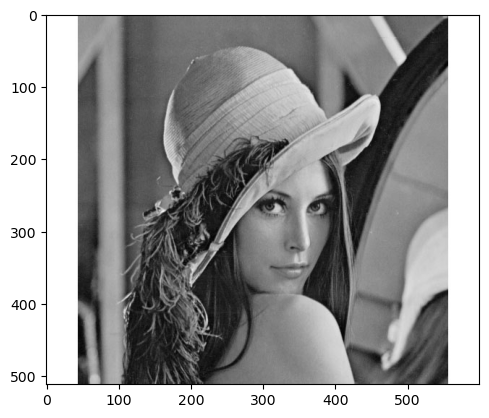

In [ ]:
import numpy as np
from scipy import signal
from scipy import misc
import matplotlib.pyplot as plt
from PIL import Image

im = Image.open('images/lena.jpg')
# Конвертируем цветное в полутоновое, используя преобразование ITU-R 601-2 Luma
image_gr = im.convert("L")

print("\n Тип оригинального изображения: %r \n\n" % image_gr)
arr = np.asarray(image_gr)
print("После преобразования в числовой формат: \n\n %r" % arr)
%matplotlib inline

imgplot = plt.imshow(arr)
imgplot.set_cmap('gray')
print("\n Входное изображение, конвертированное в полутоновое: \n")
plt.show(imgplot)

Теперь попробуем свернуть изображение с ядром детектора границ.

In [ ]:
kernel = np.array([[ 0, 1, 0],
                   [ 1,-4, 1],
                   [ 0, 1, 0],])

grad = signal.convolve2d(arr, kernel, mode='same', boundary='symm')

Амплитуда градиента, вычисленная свёрткой (карта признаков)


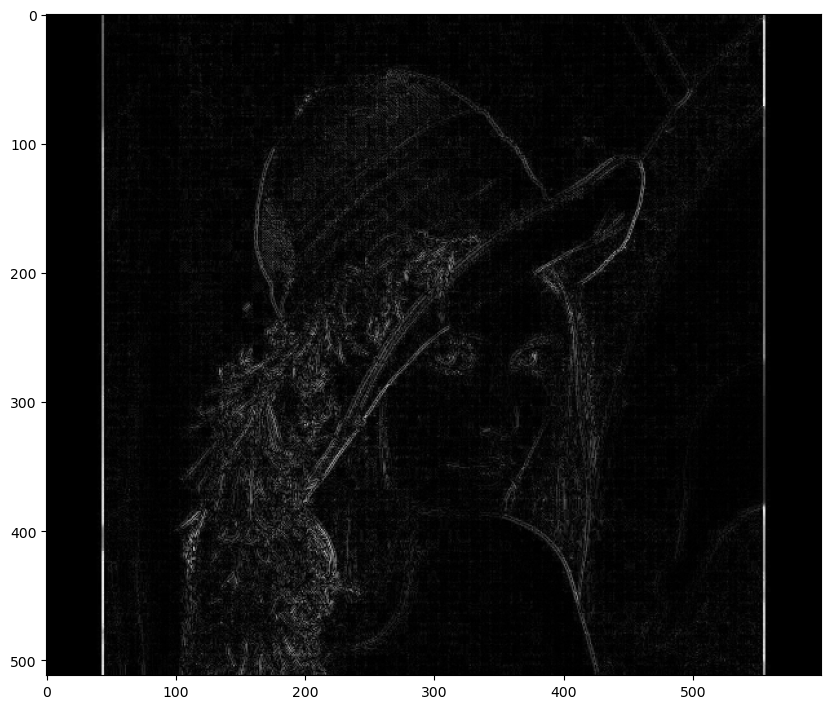

In [ ]:
print('Амплитуда градиента, вычисленная свёрткой (карта признаков)')

fig, aux = plt.subplots(figsize=(10, 10))
aux.imshow(np.absolute(grad), cmap='gray')

<b>Если мы изменим ядро и начнем анализировать выходы, мы будем действовать как свёрточная нейросеть.</b> Разница в том, что нейронная сеть делает всю эту работу автоматически (настройка ядра с помощью различных весов). Кроме того, мы можем понять, как смещения влияют на поведение карт признаков.

In [ ]:
type(grad)

grad_biases = np.absolute(grad) + 150

grad_biases[grad_biases > 255] = 255

Новая карта признаков


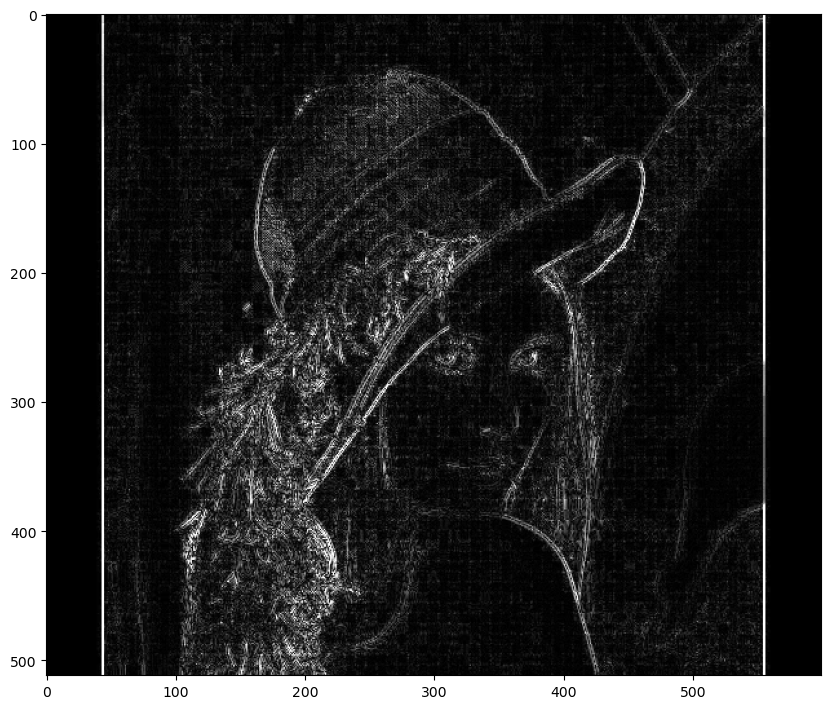

In [ ]:
%matplotlib inline

print('Новая карта признаков')

fig, aux = plt.subplots(figsize=(10, 10))
aux.imshow(np.absolute(grad_biases), cmap='gray')

## <span style="color: #f0f">Задание 1</span>

1. Из папки images загрузите изображение 'operator.png'. Выполните свёртку этого изображения с различными фильтрами, которые позволят сделать следующее:
- Выделить только вертикальные границы
- Выделить только горизонтальные границы
- Выделить диагональные границы, идущие из северо-западного угла в юго-восточный.

Фильтры постройте самостотельно и поясните, почему использовали именно такие коэффициенты.

2. Попробуйте несколько раз подряд выполнить свёртку изображения с фильтром размером 3х3, в котором все коэффициенты равны 1. Визуализируйте промежуточные результаты и объясните их.

## Свёрточные нейронные сети

### Основы и предпосылки

<b>Свёрточные нейронные сети (CNN, ConvNet)</b> очень похожи на обычные нейронные сети. Они состоят из нейронов, которые имеют обучаемые веса и смещения. Вся сеть по-прежнему выражает единственную дифференцируемую функцию оценки: от необработанных пикселей изображения на одном конце до оценок принадлежности к определённому классу на другом. И у них по-прежнему есть функция потерь (например, SVM/Softmax) на последнем (полностью подключенном) слое, поэтому большинство из сказанного ранее о нейросетях, по-прежнему применимо.

Обычные нейронные сети не очень хорошо масштабируются на полные изображения. Для набора данных изображений CIFAR-10 изображения имеют размер 32x32x3 (32 в ширину, 32 в высоту, 3 цветовых канала), поэтому один полностью подключенный нейрон в первом скрытом слое обычной нейронной сети будет иметь <b>32x32x3 = 3072 веса!</b>. Это количество все еще кажется приемлемым, но очевидно, что эта полностью связанная структура не подходит для больших изображений. Например, изображение более солидного размера, например, 200x200x3, привело бы к нейронам, имеющим 200x200x3 = 120 000 весов. Более того, нам почти наверняка понадобится многослойная сеть, так что число этих параметров будут быстро увеличиваться! <b>Очевидно, что такая полная связность является расточительной, а огромное количество параметров быстро приведет к переобучению</b>.

Таким образом, в отличие от обычной нейронной сети, в архитектуре ConvNet <b>делается явное предположение, что входными данными, в первую очередь, являются изображения</b>, что позволяет нам закодировать определенные свойства в архитектуре. Это значительно сокращает количество параметров в сети. В более явном виде слои сети ConvNet состоят из нейронов, расположенных в трех измерениях: ширина, высота, глубина. (Обратите внимание, что слово глубина здесь относится к третьему измерению активационного объема, а не к глубине полной нейронной сети, которая может относиться к общему количеству слоев в сети). Например, входные изображения в CIFAR-10 представляют собой входные объемы 32x32x3 (ширина, высота, глубина соответственно).

Для построения архитектур ConvNet мы используем три основных типа слоев:
- свёрточный слой
- слой субдискретизации (poolong)
- уже знакомы нам полносвязный слой (точно так же, как в обычных нейронных сетях).

Свёрточная нейронная сеть, как правило, сочетает в себе все эти слои.

P.S.: несмотря на изначально предполагаемую обработку изображений, свёрточные сети широко применяются в задачах прогнозирования временных рядов, NLP и даже могут решать некоторые классические задачи машинного обучения.

### 2D свёрточные слои в нейронных сетях

Какждый 2D-слой свёрточной сети представляет собой банк фильтров. Размер этого банка f1xf2xc, где f1 и f2 - ширина и высота фильтра, а c - количество фильтров. Как правило, фильтры квадратные и f1=f2=f.

Предположим, что мы будем подавать на вход данные их набора CIFAR. В этом случае входное изображение будет иметь следующий вид:

<img src="images/conv1.png" width="30%" height="30%">

32х32 - это размер изображения, а третья размерность обозначает количество цветовых каналов (RGB).
В свёрточной нейронной сети свёртка будет осуществляться с применением банков фильтров, например, 3х3 или 5х5 (могут использоваться и другие, большие, размеры). Однако, <b>глубина фильтров в банке должна совпадать с количеством цветовых каналов!</b>

<img src="images/conv2.png" width="80%" height="80%">

Свёртка означает, что мы берем фильтр и начинаем скользить им по всем возможным пространственным расположениям входного сигнала от левого верхнего угла до правого нижнего. Этот фильтр представляет собой набор весов, т.е. 5x5x3=75 весов + 1 смещение = 76 параметров в целом (веса фильтра являются параметрами, которые обучаются на этапе обратного распространения). В каждой позиции взвешенная сумма пикселей рассчитывается как $W^TX + b$ и получается новое значение.

Обычно используется несколько фильтров (каждый из которых независим друг от друга). Поэтому, если используется 10 фильтров (число - это гиперпараметр, который мы можем и должны настраивать), результат будет выглядеть следующим образом:

<img src="images/conv3.png">

### Размеры карт активации

Вы могли заметить, что на выходе мы получили блок размером 28×28, когда на входе было 32×32. Почему так? Давайте рассмотрим более простой случай. Предположим, что исходное изображение имеет размер 6x6xd, а фильтр имеет размер 3x3xd. Поскольку размер глубины входного изображения и фильтра всегда одинаков, мы можем рассматривать его только с точки зрения вида сверху вниз (без учета глубины).

<img src="images/conv4.png" width="90%" height="90%">

Определим общий случай, когда изображение имеет размерность $N \times N \times d$ а фильтр $F \times F \times d$. Также определим еще один гиперпараметр **stride (S)**, который представляет собой количество ячеек (в матрице выше) для перемещения на каждом шаге. У нас страйд был равен 1, но он может быть и большим. Учитывая эту информацию, размер вывода можно вычислить по следующей формуле:

$$(N – F)/S + 1$$

Если учесть возможное дополнение (padding) по краям изображения, например, при 'same' свёртке, то в общем виде формула будет иметь следующий вид:

$$(N−F+2P)/S+1$$,

где P - это размер дополнения (padding).

### Слои субдискретизации (pooling)

Мы используем дополнение в слое свертки для сохранения размера входных данных. Слои субдискретизации, наоборот, используются для УМЕНЬШЕНИЯ размера входных данных. Они отвечают за понижение дискретизации сети, чтобы сделать ее более управляемой. Наиболее распространенной формой выполнения понижающей выборки является max-pooling.

Рассмотрим следующий слой 4×4. Если мы используем фильтр 2×2 с шагом 2 и max-pooling, то получим следующий результат:

<img src="images/pool1.png" width="70%" height="70%">

Обычно в архитектуре ConvNet принято периодически вставлять слой субдискретизации между последовательными слоями Conv. Его функция заключается в постепенном уменьшении пространственного размера карт активации для уменьшения количества параметров и вычислений в сети, а следовательно, и для контроля переоучения.

Наиболее распространенной формой является слой субдискретизации с фильтрами размера 2x2 и с шагом 2. Каждая операция max-pooling в этом случае представляет собой взятие максимума над 4 числами (маленькая область 2x2 в некотором срезе глубины). Размер глубины остается неизменным для этой операции.


### Пример свёрточной нейронной сети

Типовая структура свёрточной сети выглядит примерно так:

INPUT -> [ [CONV -> RELU] x N -> POOL?] x M -> [FC -> RELU] x K -> FC

Следует учитывать, что каждый свёрточный слой, как и поносвязный, требует внесения нелинейности на выходе, поэтому после свёрток, как правило, применяют ReLU.

Построим простую свёрточную нейронную сеть для распознавания рукописных цифр из набора данных MNIST.
Для выбора модели будем использовать kFold перекрёстную проверку (cross-validation).

In [ ]:
from numpy import mean
from numpy import std
from matplotlib import pyplot as plt
from sklearn.model_selection import KFold
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import SGD
from keras.utils.vis_utils import plot_model

Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


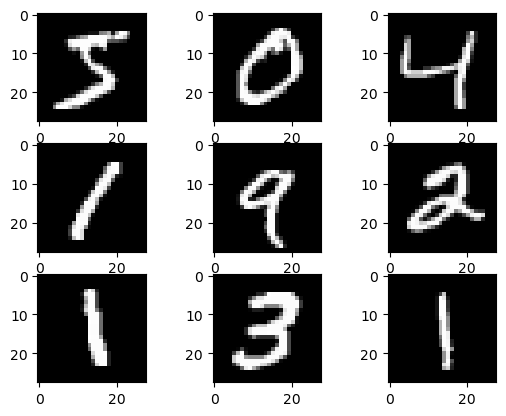

In [ ]:
(trainX, trainy), (testX, testy) = mnist.load_data()
# Посмотрим, что там
print('Train: X=%s, y=%s' % (trainX.shape, trainy.shape))
print('Test: X=%s, y=%s' % (testX.shape, testy.shape))
# Выведем первые несколько изображений
for i in range(9):
    plt.subplot(330 + 1 + i)
    # Покажем пиксети как есть
    plt.imshow(trainX[i], cmap=plt.get_cmap('gray'))

plt.show()

Основные операции, такие как загрузка данных, масштабирование и построение модели оформим в виде функций.

In [ ]:
# Загрузка набора данных
def load_dataset():
    (trainX, trainY), (testX, testY) = mnist.load_data()
    # Меняем форму, чтобы набор был одноканальным
    trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
    testX = testX.reshape((testX.shape[0], 28, 28, 1))
    # применяем унитарное кодирование к размеченным выходам
    trainY = to_categorical(trainY)
    testY = to_categorical(testY)
    return trainX, trainY, testX, testY

In [ ]:
# Масштабирование
def prep_pixels(train, test):
    # Конвертируем в вещественные значения
    train_norm = train.astype('float32')
    test_norm = test.astype('float32')
    # Приводим яркости к диапазону [0; 1]
    train_norm = train_norm / 255.0
    test_norm = test_norm / 255.0
    return train_norm, test_norm

In [ ]:
# Построение модели CNN
def define_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(10, activation='softmax'))
    # compile model
    opt = SGD(learning_rate=0.01, momentum=0.9)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
model = define_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 5408)              0         
_________________________________________________________________
dense (Dense)                (None, 100)               540900    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1010      
Total params: 542,230
Trainable params: 542,230
Non-trainable params: 0
_________________________________________________________________


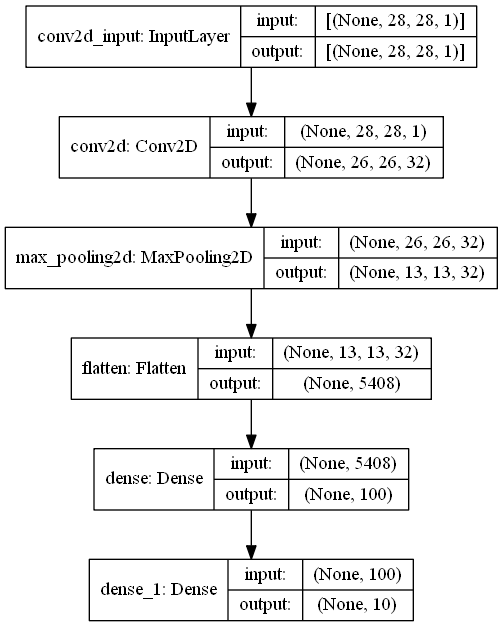

In [ ]:
#визуализация модели
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
# Построим и оценим модель, используя k-fold кросс-валидацию
def evaluate_model(dataX, dataY, n_folds=5):
    scores, histories = list(), list()
    # Настраиваем кросс-валидацию
    kfold = KFold(n_folds, shuffle=True, random_state=1)
    # Обходим все разбиения
    for train_ix, test_ix in kfold.split(dataX):
        # Строим модель
        model = define_model()
        # Получаем данные для обучающей и проверочной выборки
        trainX, trainY, testX, testY = dataX[train_ix], dataY[train_ix], dataX[test_ix], dataY[test_ix]
        # Учим модель - это не очень быстро на старых ПК, но за несколько минут отработает
        history = model.fit(trainX, trainY, epochs=10, batch_size=32, validation_data=(testX, testY), verbose=0)
        # Оцениваем модель
        _, acc = model.evaluate(testX, testY, verbose=1)
        print('> %.3f' % (acc * 100.0))
        # Сохраняем статистику - пригодится для построения графиков
        scores.append(acc)
        histories.append(history)

    return scores, histories

In [ ]:
# Строим кривые обучения для диагностики
def summarize_diagnostics(histories):
    for i in range(len(histories)):
        # plot loss
        plt.subplot(2, 1, 1)
        plt.title('Cross Entropy Loss')
        plt.plot(histories[i].history['loss'], color='blue', label='train')
        plt.plot(histories[i].history['val_loss'], color='orange', label='test')
        # plot accuracy
        plt.subplot(2, 1, 2)
        plt.title('Classification Accuracy')
        plt.plot(histories[i].history['accuracy'], color='blue', label='train')
        plt.plot(histories[i].history['val_accuracy'], color='orange', label='test')
    plt.show()

In [ ]:
# Подбиваем итоги по результатам
def summarize_performance(scores):
    # Выводим статистику
    print('Accuracy: mean=%.3f std=%.3f, n=%d' % (mean(scores)*100, std(scores)*100, len(scores)))
    # Строим графики (коробочный график и "усы")
    plt.boxplot(scores)
    plt.show()

375/375 [==============================] - 1s 3ms/step - loss: 0.0593 - accuracy: 0.9859
> 98.592
375/375 [==============================] - 1s 3ms/step - loss: 0.0477 - accuracy: 0.9883
> 98.825
375/375 [==============================] - 1s 3ms/step - loss: 0.0532 - accuracy: 0.9862
> 98.617
375/375 [==============================] - 1s 3ms/step - loss: 0.0465 - accuracy: 0.9878
> 98.783
375/375 [==============================] - 1s 3ms/step - loss: 0.0500 - accuracy: 0.9881
> 98.808


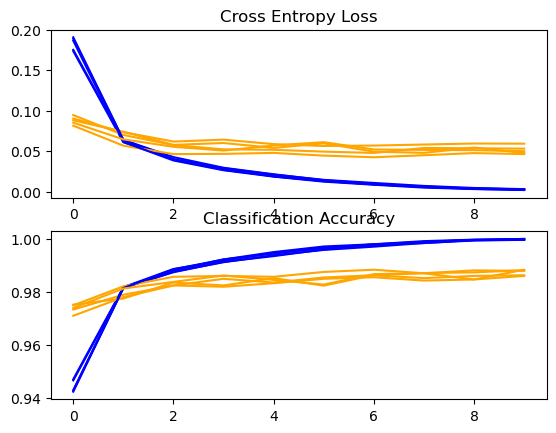

Accuracy: mean=98.725 std=0.100, n=5


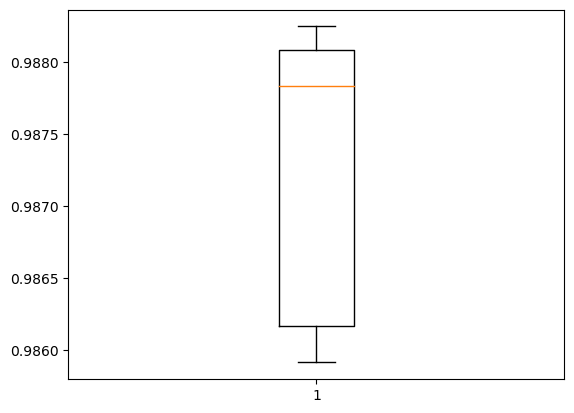

In [ ]:
# Запускаем процесс - это главная функция
def run():
    # Грузим данные
    trainX, trainY, testX, testY = load_dataset()
    # Нормализуем изображения для Tensorflow и нейросети
    trainX, testX = prep_pixels(trainX, testX)
    # Строим и оцениваем модель
    scores, histories = evaluate_model(trainX, trainY)
    # Строим кривые обучения
    summarize_diagnostics(histories)
    # Считаем агрегированную статистику
    summarize_performance(scores)


# Точка входа - 3... 2... 1... Поехали!
run()

Получен неплохой результат, но его можно улучшить. Вам предлагается задание, в котором это можно сделать самостоятельно.

## <span style="color: #f0f">Задание 2</span>

Считаем построенную модель базовой (baseline). Теперь давайте улучшим её и выжмем столько точности, сколько получится.

1. Усовершенствуйте данную модель, добавив слой батч-нормализации. Оцените изменение результата.
2. Увеличьте размеры карт активации модели в несколько раз. Переобучите модель. Оцените изменение результата. Что можно сказать о такой модели, судя из кривых обучения?
3. Увеличьте глубину модели и переобучите её. Оцените изменение результата.
4. Найдите модель, которая устойчиво даёт точность классификации более 99% и при этом не является слишком большой.

# Классификация изображений

## Задача классификации

<b>Задача классификации изображений</b> – это базовая задача, которая относится к области компьютерного зрения.

Пусть дано множество классов (меток), например, {кот, собака, грузовик, самолёт, катер, …} и дано изображение некоторого объекта. Необходимо отнести это изображение к одному классу из заданных

<img src="images_cls/classify.svg" alt="Image classification" style="width: 800px; height: 400px;">

Задача классификации - это задача обучения с учителем, поэтому нам понадобятся размеченные данные.

В отдельных сценариях задачу классификации можно решать прстыми классическими методами машинного обучения, но в общем случае делать этого не рекомендуется из-за семантического разрыва в восприятии изображений, большого количества свойств и особенностей различных изображений. Поэтому, как правило, в настоящее время применяются нейросетевые методы.

## Простой пример

<b>Введение.</b> Рассмотрим простой вариант решения задачи классификации изображений на примере набора данных Fashion-MNIST. Этот набор данных является неплохой альтернативой набору MNIST (который уже всем надоел). Изображения из этого набора представляют собой фото различных элементов одежды, таким образом мы молучаем большую вариативность внутри каждого класса.

<img src="images_cls/fashion-mnist-sprite.png" alt="Fashion-MNIST preview" style="width: 600px; height: 600px;">

<center>Рис. Предпросмотр набора данных Fashion-MNIST</center>

In [ ]:
# Импорты нужных нам библиотек и фреймворков
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import zipfile
import random
from shutil import copyfile

print(tf.__version__)

2.6.0


In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
class_names = ['Футболка/топ', 'Брюки', 'Пуловер', 'Платье', 'Пальто',
               'Сандалии', 'Рубаха', 'Кроссовки', 'Сумка', 'Полуботинки']

Посмотрим на характеристики набора данных

In [ ]:
print(train_images.shape)
print(len(train_labels))
print(train_labels)
print(test_images.shape)
print(len(test_labels))

(60000, 28, 28)
60000
[9 0 0 ... 3 0 5]
(10000, 28, 28)
10000


Каждое индивидуальное изображение должно быть полутоновым. Убедимся на примере, что изображения имеют размер 28x28, а значения интенсивности пикселей попадают в диапазон 0..255

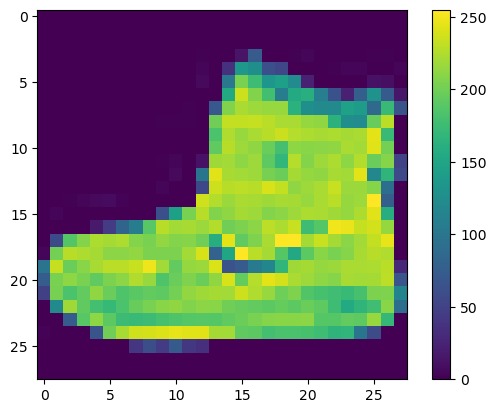

In [ ]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

# Посмотрели - теперь приведём яркости к диапазону 0..1
train_images = train_images / 255.0
test_images = test_images / 255.0

Посмотрим на образцы

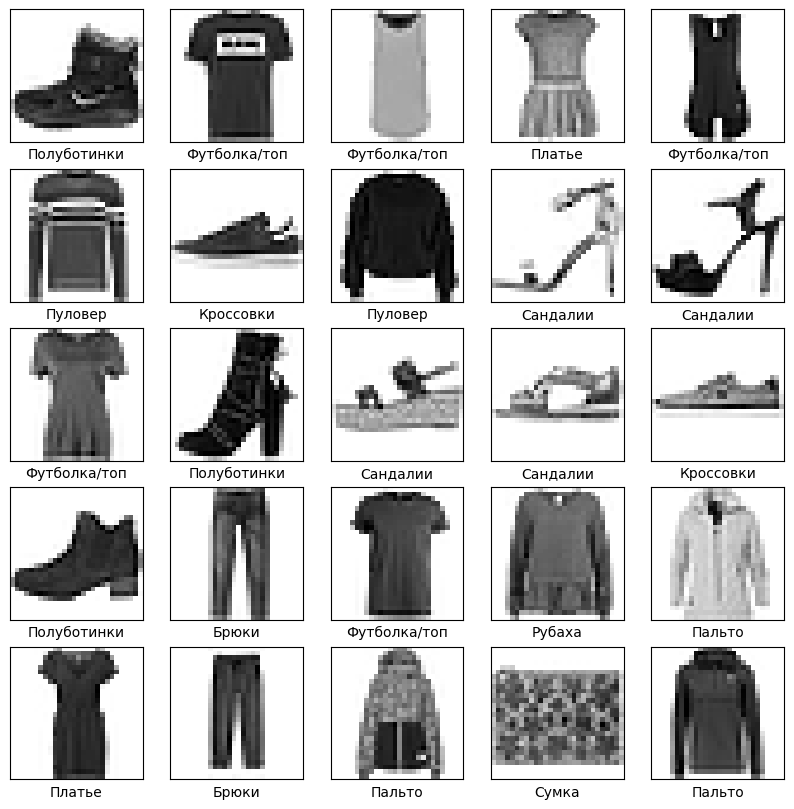

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

Соберём простую модель. Раз изображения - сразу на свёрточных сетях.

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

Компилируем модель

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 13, 13, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 5408)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               692352    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
__________________________________________________

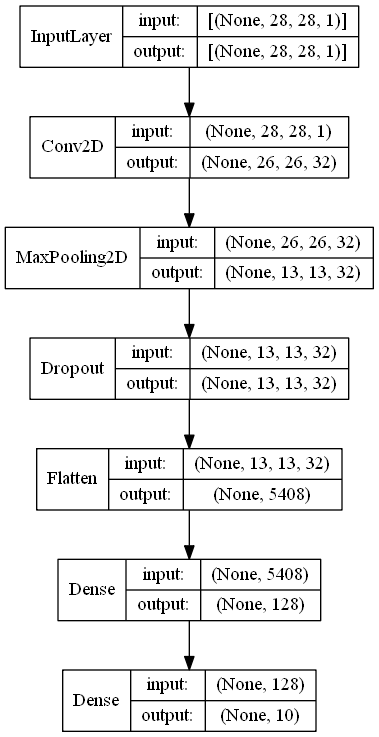

In [ ]:
model.compile(loss=tf.keras.losses.sparse_categorical_crossentropy,
              optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])
model.summary()
tf.keras.utils.plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=False)

Обучим нашу сеть

In [ ]:
train_images = np.expand_dims(train_images, -1)
test_images = np.expand_dims(test_images, -1)
history = model.fit(train_images, train_labels, batch_size=256, epochs=10,validation_split=0.2,verbose=1)

Epoch 1/10
188/188 [==============================] - 9s 18ms/step - loss: 0.5208 - accuracy: 0.8232 - val_loss: 0.3638 - val_accuracy: 0.8729
Epoch 2/10
188/188 [==============================] - 3s 16ms/step - loss: 0.3419 - accuracy: 0.8799 - val_loss: 0.3271 - val_accuracy: 0.8863
Epoch 3/10
188/188 [==============================] - 3s 16ms/step - loss: 0.3046 - accuracy: 0.8899 - val_loss: 0.3045 - val_accuracy: 0.8929
Epoch 4/10
188/188 [==============================] - 3s 16ms/step - loss: 0.2789 - accuracy: 0.8999 - val_loss: 0.2875 - val_accuracy: 0.8992
Epoch 5/10
188/188 [==============================] - 3s 16ms/step - loss: 0.2589 - accuracy: 0.9075 - val_loss: 0.2662 - val_accuracy: 0.9047
Epoch 6/10
188/188 [==============================] - 3s 17ms/step - loss: 0.2431 - accuracy: 0.9125 - val_loss: 0.2601 - val_accuracy: 0.9067
Epoch 7/10
188/188 [==============================] - 3s 16ms/step - loss: 0.2312 - accuracy: 0.9158 - val_loss: 0.2611 - val_accuracy: 0.9043

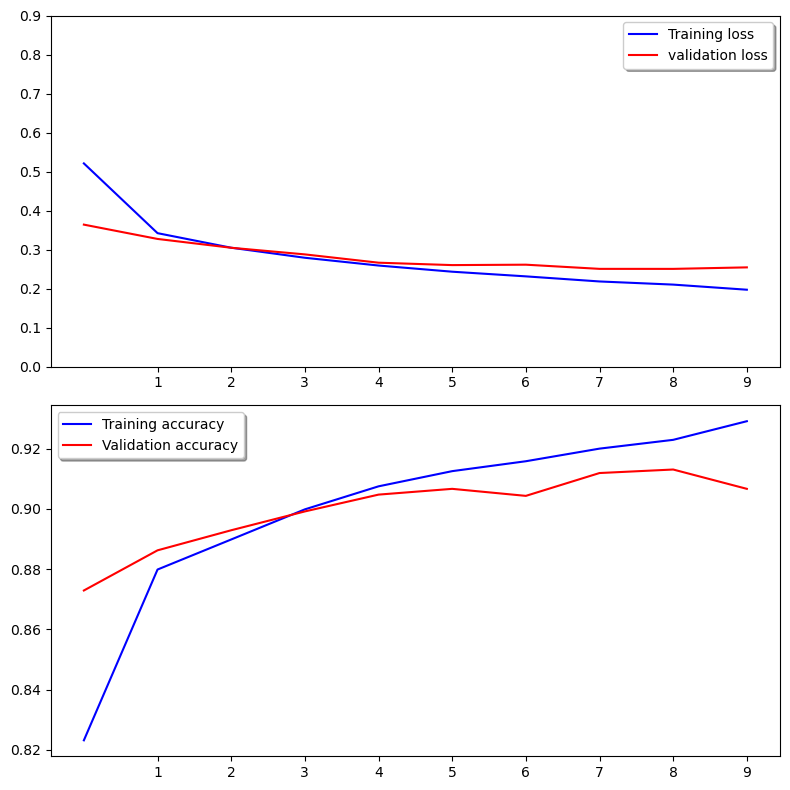

In [ ]:
def learning_curves(history, epochs):
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 8))
    ax1.plot(history.history['loss'], color='b', label="Training loss")
    ax1.plot(history.history['val_loss'], color='r', label="validation loss")
    ax1.set_xticks(np.arange(1, epochs, 1))
    ax1.set_yticks(np.arange(0, 1, 0.1))
    legend1 = ax1.legend(loc='best', shadow=True)

    ax2.plot(history.history['accuracy'], color='b', label="Training accuracy")
    ax2.plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
    ax2.set_xticks(np.arange(1, epochs, 1))

    legend2 = ax2.legend(loc='best', shadow=True)
    plt.tight_layout()
    plt.show()

learning_curves(history, 10)

In [ ]:
predicted_classes = model.predict(test_images)
predicted_classes = np.argmax(predicted_classes, axis=1)
print(classification_report(test_labels, predicted_classes, target_names=class_names))

              precision    recall  f1-score   support

Футболка/топ       0.84      0.86      0.85      1000
       Брюки       0.99      0.97      0.98      1000
     Пуловер       0.85      0.85      0.85      1000
      Платье       0.86      0.95      0.90      1000
      Пальто       0.80      0.91      0.85      1000
    Сандалии       0.98      0.97      0.98      1000
      Рубаха       0.84      0.62      0.72      1000
   Кроссовки       0.92      0.98      0.95      1000
       Сумка       0.98      0.97      0.98      1000
 Полуботинки       0.98      0.94      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



Проанализируем ошибки.

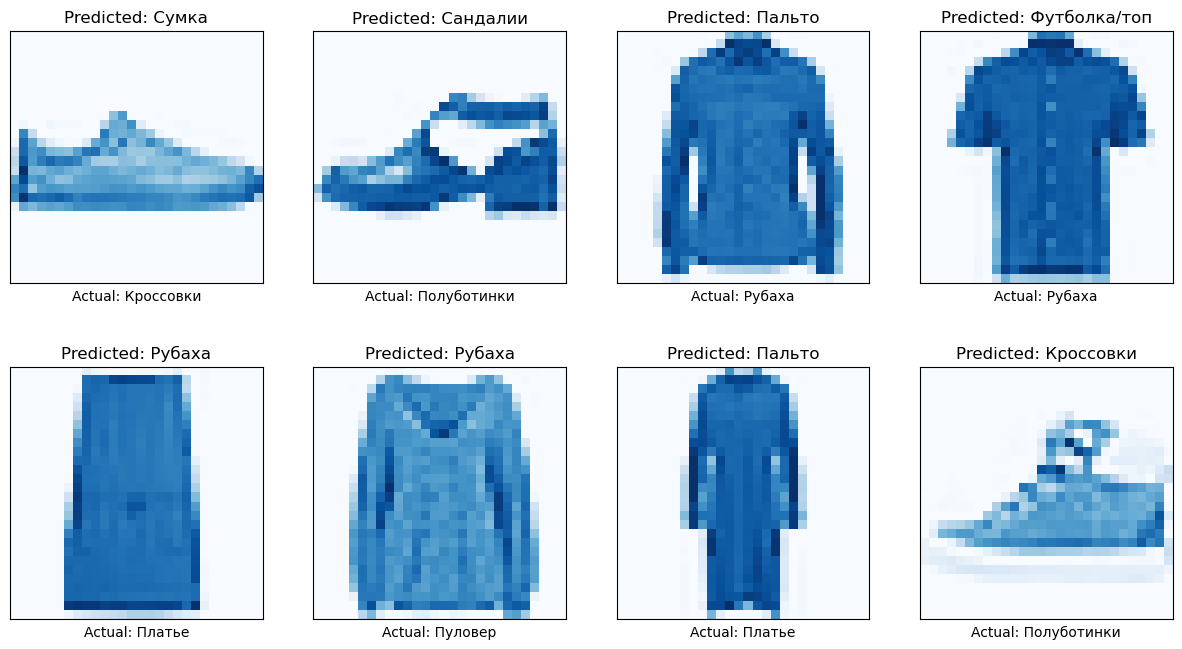

In [ ]:
incorrect = np.nonzero(predicted_classes!=test_labels)[0]
plt.figure(figsize=(15, 8))
for j, incorrect in enumerate(incorrect[0:8]):
    plt.subplot(2, 4, j+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(test_images[incorrect].reshape(28, 28), cmap="Blues")
    plt.title("Predicted: {}".format(class_names[predicted_classes[incorrect]]))
    plt.xlabel("Actual: {}".format(class_names[test_labels[incorrect]]))

## Классификация на своих данных

В реальности, мы будем решать задачу классификации не на встроенных наборах, а на своих данных. Рассмотрим, как мы будем готовить наборы для обучения модели на примере датасета "Cats vs Dogs". Этот набор не является встроенным и представляет собой архив с изображениями.

In [ ]:
# Раскомментируйте строки ниже, если будете запускать пример на *NIX системах или в Colab. Иначе распакуйте вручную
#!curl -O https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip
#!unzip -q kagglecatsanddogs_5340.zip

### Подготовка своего набора данных.

Набор данных для решения задачи классификации, как правило, имеет определённую структуру. При этом фреймворк TensorFlow и API Keras предполагают, что данные изображений будут предъявляться на вход модели в определённой структуре. Её примерный вид показан ниже на рис.

<img src="images_cls/dataset.png" alt="Image classification" style="width: 800px; height: 400px;">

Как видно из рисунка, предполагается, что для каждого класса будет создана директория, которая и будет содержать изображения объектов, которые относятся к ней.

In [ ]:
import pathlib
data_dir = pathlib.Path("PetImages")

Отфильтруем испорченные изображения и побочные файлы, анализируя наличие корректного заголовка графического файла.

In [ ]:
import os

num_skipped = 0
for folder_name in ("Cat", "Dog"):
    folder_path = os.path.join(data_dir, folder_name)
    for fname in os.listdir(folder_path):
        fpath = os.path.join(folder_path, fname)
        try:
            fobj = open(fpath, "rb")
            is_jfif = tf.compat.as_bytes("JFIF") in fobj.peek(10)
        finally:
            fobj.close()

        if not is_jfif:
            num_skipped += 1
            # Удаляем испорченные и не поддерживаемые изображения
            os.remove(fpath)

print("Deleted %d images" % num_skipped)

Deleted 1578 images


In [ ]:
image_size = (150, 150)
batch_size = 16

train_ds = tf.keras.utils.image_dataset_from_directory(data_dir, validation_split=0.2,
    subset="training",
    seed=42,
    image_size=image_size,
    batch_size=batch_size,
)

val_ds = tf.keras.utils.image_dataset_from_directory(data_dir, validation_split=0.2,
    subset="validation",
    seed=42,
    image_size=image_size,
    batch_size=batch_size,
)

Found 23422 files belonging to 2 classes.
Using 18738 files for training.
Found 23422 files belonging to 2 classes.
Using 4684 files for validation.


In [ ]:
train_ds.take(1)

<TakeDataset shapes: ((None, 150, 150, 3), (None,)), types: (tf.float32, tf.int32)>

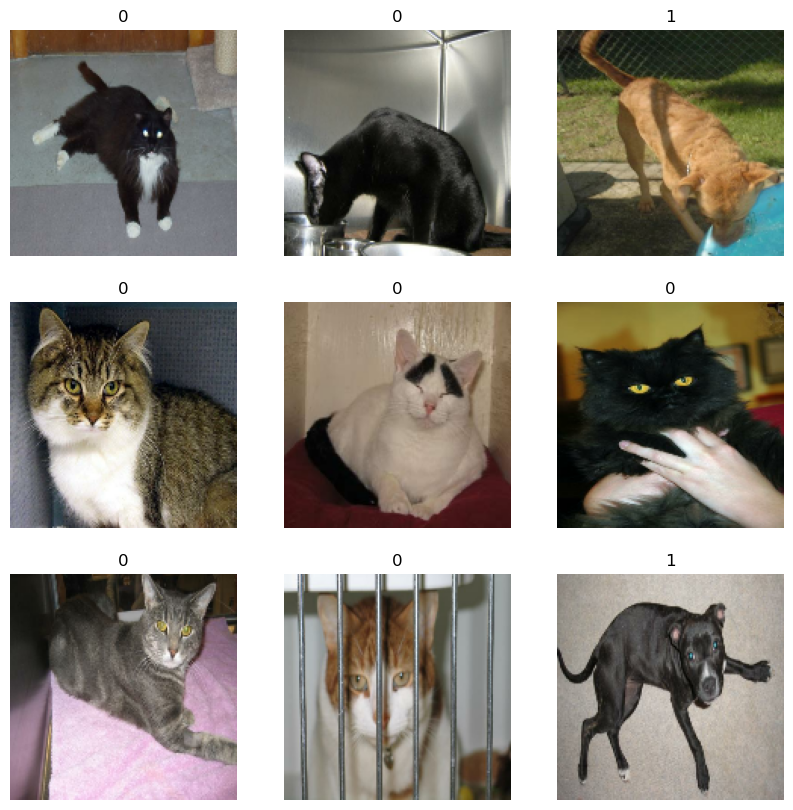

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")


## Классифицирующая модель.

В качестве классификатора используем свёрточную нейронную сеть, сделав её чуть сложнее, чем в случае Fashion MNIST.

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Rescaling(1.0 / 255, input_shape=(150, 150, 3)),
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
model.compile(loss=tf.keras.losses.binary_crossentropy,
              optimizer=tf.keras.optimizers.Adam(1e-3), metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 150, 150, 3)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 64)       

In [ ]:
history = model.fit(train_ds, validation_data=val_ds, epochs=10, verbose=1)

Epoch 1/10
1172/1172 [==============================] - 45s 37ms/step - loss: 0.6105 - accuracy: 0.6645 - val_loss: 0.5367 - val_accuracy: 0.7301
Epoch 2/10
1172/1172 [==============================] - 43s 37ms/step - loss: 0.4769 - accuracy: 0.7716 - val_loss: 0.4612 - val_accuracy: 0.7797
Epoch 3/10
1172/1172 [==============================] - 44s 37ms/step - loss: 0.3772 - accuracy: 0.8302 - val_loss: 0.4487 - val_accuracy: 0.7912
Epoch 4/10
1172/1172 [==============================] - 43s 37ms/step - loss: 0.2547 - accuracy: 0.8885 - val_loss: 0.5221 - val_accuracy: 0.7985
Epoch 5/10
1172/1172 [==============================] - 43s 37ms/step - loss: 0.1336 - accuracy: 0.9466 - val_loss: 0.6774 - val_accuracy: 0.7997
Epoch 6/10
1172/1172 [==============================] - 44s 38ms/step - loss: 0.0719 - accuracy: 0.9747 - val_loss: 1.1281 - val_accuracy: 0.7803
Epoch 7/10
1172/1172 [==============================] - 43s 37ms/step - loss: 0.0594 - accuracy: 0.9786 - val_loss: 1.0166 -

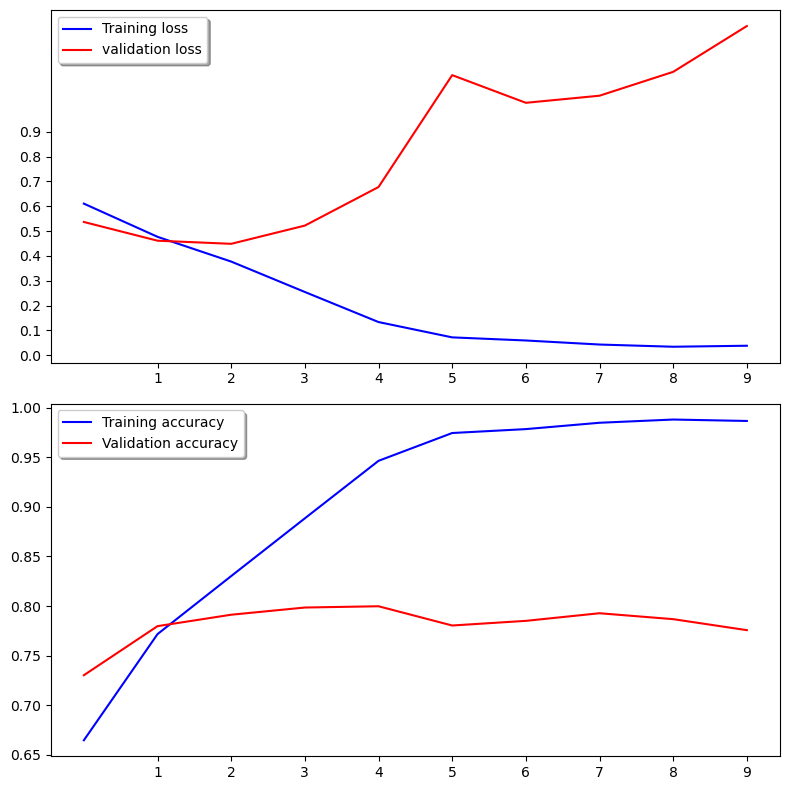

In [ ]:
learning_curves(history, 10)

## Дополнение (обогащение) данных.

В общем случае, задача классификации изображений сопряжена со следующими сложностями:
* изменчивость области просмотра
* разница в освещении
* деформация и обрезка объектов
* и др.

Чтобы нейронная сеть научилась распознавать объекты в любых условиях, её надо в этих же условиях и обучить. Следовательно, понадобятся данные с учётом всех указанных выше особенностей. При этом, чтобы провести обучение, нам понадобится значимая выборка для каждого варианта.

Данные не всегда просто собрать, к тому же, не всегда получится найти примеры с учётом всех возможных отклонений. Поэтому на практике выполняют дополнение данных.

Обогащени данных (Data Augmentation) - это искусственное расширение исходной выборки, за счёт которого можно как просто увеличить количество обучающих примеров, так и попытаться учесть особенности класификации изображений в разных условиях.


### Реализация обогащения данных

Один из вариантов: сделать обогащение данных самостоятельным преобразубщим алгоритмом

In [ ]:
data_augmentation = tf.keras.Sequential(
    [
        tf.keras.layers.RandomFlip("horizontal"),
        tf.keras.layers.RandomRotation(0.1),
    ]
)

Посмотрим, что получится, если мы применим этот алгоритм к нашим котэ.

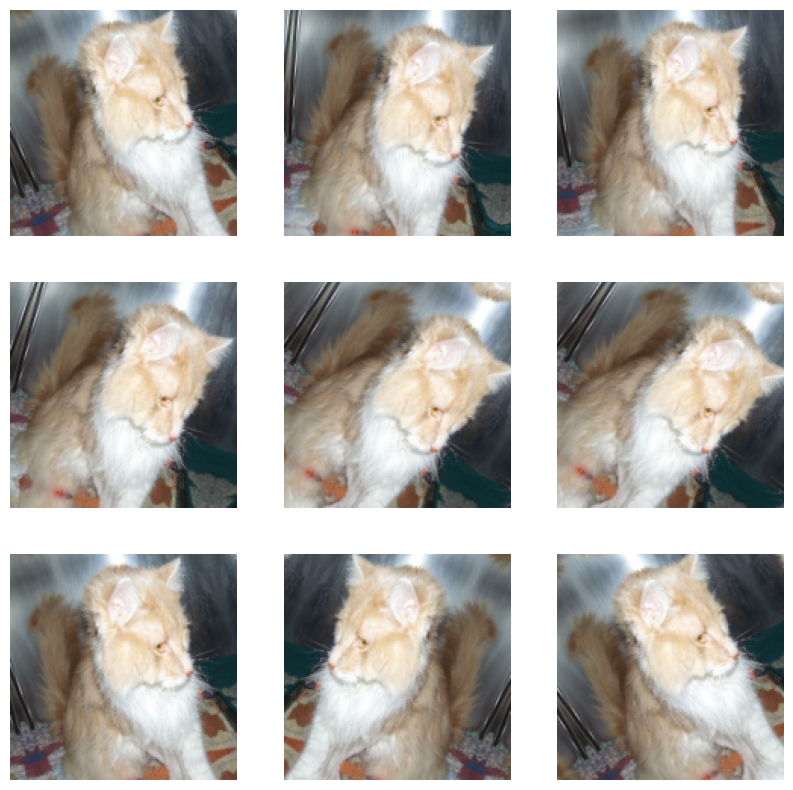

In [ ]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

Существует несколько способов реализации дополнения данных и далее мы с ними ознакомимся.

### Вариант 1. Обогащение данных как часть модели

В данном случае мы включаем наши преобразования в модель и обогащение данных будет происходить прямо при работе модели.

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(150, 150, 3)),
    data_augmentation,
    tf.keras.layers.Rescaling(1.0 / 255),
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
model.compile(loss=tf.keras.losses.binary_crossentropy,
              optimizer=tf.keras.optimizers.Adam(1e-3), metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_2 (Sequential)    (None, 150, 150, 3)       0         
_________________________________________________________________
rescaling_1 (Rescaling)      (None, 150, 150, 3)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 64)       

In [ ]:
history = model.fit(train_ds, validation_data=val_ds, epochs=10, verbose=1)

Epoch 1/10
1178/1178 [==============================] - 35s 29ms/step - loss: 0.6111 - accuracy: 0.6646 - val_loss: 0.5438 - val_accuracy: 0.7270
Epoch 2/10
1178/1178 [==============================] - 34s 29ms/step - loss: 0.5329 - accuracy: 0.7324 - val_loss: 0.4981 - val_accuracy: 0.7567
Epoch 3/10
1178/1178 [==============================] - 33s 28ms/step - loss: 0.4832 - accuracy: 0.7694 - val_loss: 0.4585 - val_accuracy: 0.7756
Epoch 4/10
1178/1178 [==============================] - 33s 28ms/step - loss: 0.4525 - accuracy: 0.7881 - val_loss: 0.4099 - val_accuracy: 0.8106
Epoch 5/10
1178/1178 [==============================] - 34s 29ms/step - loss: 0.4222 - accuracy: 0.8065 - val_loss: 0.3720 - val_accuracy: 0.8274
Epoch 6/10
1178/1178 [==============================] - 34s 29ms/step - loss: 0.4019 - accuracy: 0.8176 - val_loss: 0.3661 - val_accuracy: 0.8401
Epoch 7/10
1178/1178 [==============================] - 34s 29ms/step - loss: 0.3799 - accuracy: 0.8297 - val_loss: 0.3800 -

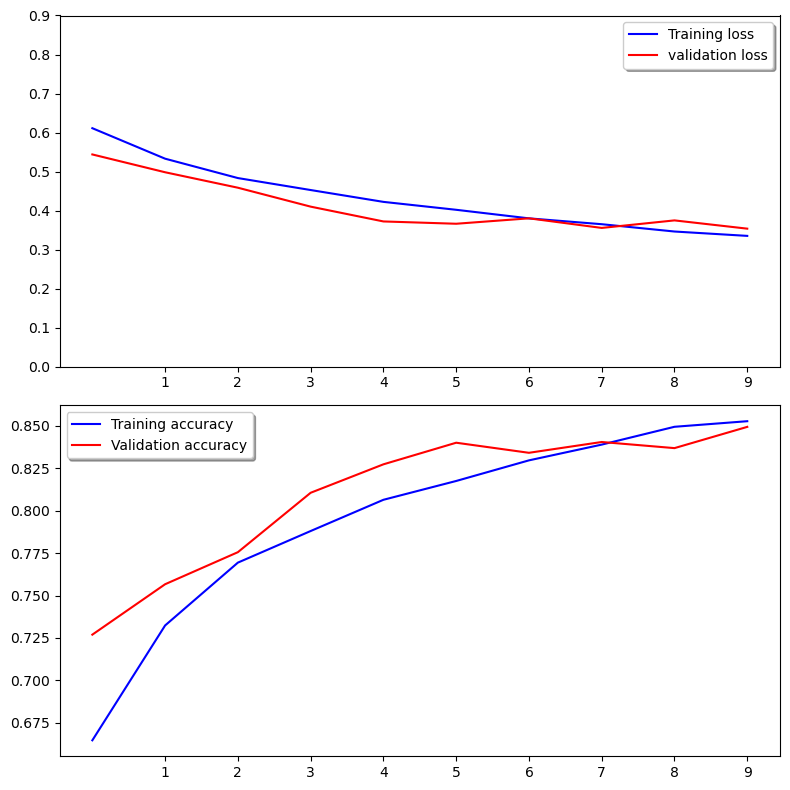

In [ ]:
learning_curves(history, 10)

### Вариант 2. Обогащение данных на уровне набора данных

Обогащение данных можно применить к набору даных и не трогать саму модель. При этом обогащение не будет применяться в рабочем режиме.

In [ ]:
augmented_train_ds = train_ds.map(
    lambda x, y: (data_augmentation(x), y))

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(150, 150, 3)),
    tf.keras.layers.Rescaling(1.0 / 255),
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss=tf.keras.losses.binary_crossentropy,
              optimizer=tf.keras.optimizers.Adam(1e-3), metrics=['accuracy'])

In [ ]:
history = model.fit(augmented_train_ds, validation_data=val_ds, epochs=10, verbose=1)

Epoch 1/10
1178/1178 [==============================] - 93s 78ms/step - loss: 0.6016 - accuracy: 0.6653 - val_loss: 0.5161 - val_accuracy: 0.7382
Epoch 2/10
1178/1178 [==============================] - 87s 74ms/step - loss: 0.5179 - accuracy: 0.7430 - val_loss: 0.4937 - val_accuracy: 0.7590
Epoch 3/10
1178/1178 [==============================] - 86s 73ms/step - loss: 0.4762 - accuracy: 0.7714 - val_loss: 0.4198 - val_accuracy: 0.8000
Epoch 4/10
1178/1178 [==============================] - 87s 74ms/step - loss: 0.4408 - accuracy: 0.7953 - val_loss: 0.4092 - val_accuracy: 0.8117
Epoch 5/10
1178/1178 [==============================] - 88s 75ms/step - loss: 0.4148 - accuracy: 0.8104 - val_loss: 0.3931 - val_accuracy: 0.8170
Epoch 6/10
1178/1178 [==============================] - 89s 76ms/step - loss: 0.3942 - accuracy: 0.8227 - val_loss: 0.3736 - val_accuracy: 0.8338
Epoch 7/10
1178/1178 [==============================] - 89s 75ms/step - loss: 0.3706 - accuracy: 0.8358 - val_loss: 0.3618 -

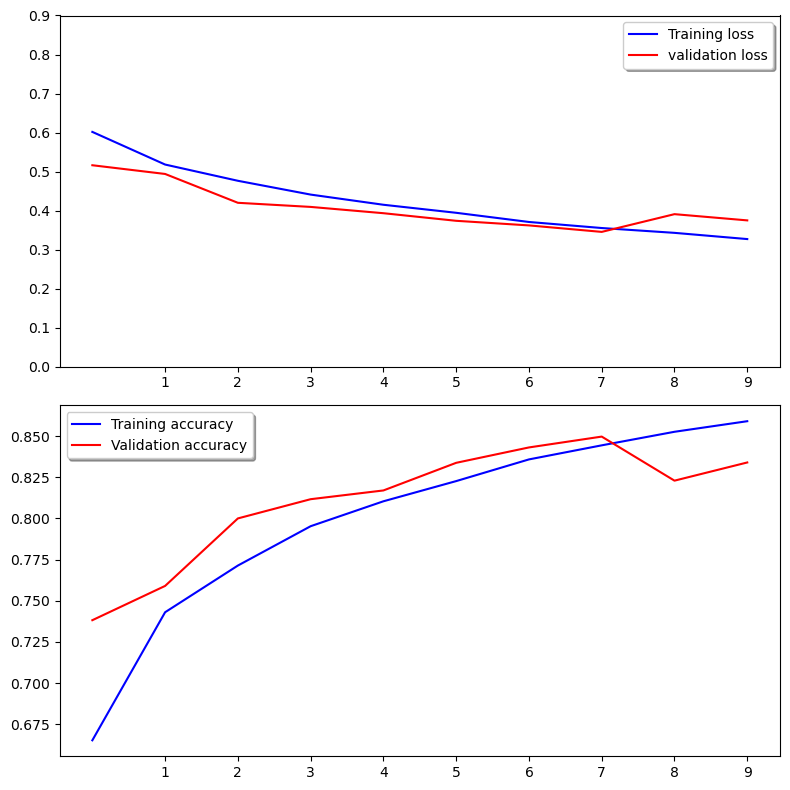

In [ ]:
learning_curves(history, 10)

### Вариант 3. Использование генераторов

Для загрузки изображений и автоматического обогащения можно применять генераторы изображений. Они представлены встроенным классом keras.preprocessing.image.ImageDataGenerator.

Генератор обеспечивает автоматическую загрузку изображений из директори на диске, преобразования и дополнение изображений. Фактически, заменяет собой набор данных с указанными свойствами.

Для генераторов необходимо подготовить директории с изображениями, которые разделены на обучающую и тестовую выборки.

In [ ]:
try:
    os.mkdir('tmp')
    os.mkdir('tmp/train')
    os.mkdir('tmp/test')
    os.mkdir('tmp/train/cats')
    os.mkdir('tmp/train/dogs')
    os.mkdir('tmp/test/cats')
    os.mkdir('tmp/test/dogs')
except OSError:
    pass

In [ ]:
def split_data(src_dir, train_dir, test_dir, split_size):
    files = []
    for filename in os.listdir(src_dir):
        file = src_dir + filename
        if os.path.getsize(file) > 0:
            files.append(filename)
        else:
            print(filename + " игнорируем файл нулевой длины.")

    training_length = int(len(files) * split_size)
    testing_length = int(len(files) - training_length)
    shuffled_set = random.sample(files, len(files))
    training_set = shuffled_set[0:training_length]
    testing_set = shuffled_set[:testing_length]

    for filename in training_set:
        this_file = src_dir + filename
        destination = train_dir + filename
        copyfile(this_file, destination)

    for filename in testing_set:
        this_file = src_dir + filename
        destination = test_dir + filename
        copyfile(this_file, destination)

In [ ]:
cats_src = "PetImages/Cat/"
train_cats = "tmp/train/cats/"
test_cats = "tmp/test/cats/"
dogs_src = "PetImages/Dog/"
train_dogs = "tmp/train/dogs/"
test_dogs = "tmp/test/dogs/"

In [ ]:
split_size = .8
split_data(cats_src, train_cats, test_cats, split_size)
split_data(dogs_src, train_dogs, test_dogs, split_size)

У нас должны получиться 2 директории, train и test, в каждой из которых изображения рпсположены в поддиректориях, соответствующих меткам классов.

Теперь создадим сами генераторы. В настройках генератора укажем настройки различных преобразований для обогащения данных. Если это сделать, то к изображениям случайным образом будут применяться настроенные преобразования. Для того, чтобы получить пригодный для обучения набор данных, после конфигурирования генератора надо вызвать метод flow_from_directory.

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dir = "tmp/train"

train_datagen = ImageDataGenerator(rescale=1./255,
      rotation_range=40,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=16,
                                                    class_mode='binary',
                                                    target_size=(150, 150))

val_dir = "tmp/test"

validation_datagen = ImageDataGenerator(rescale=1./255,
      rotation_range=40,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')
validation_generator = validation_datagen.flow_from_directory(val_dir,
                                                              batch_size=16,
                                                              class_mode='binary',
                                                              target_size=(150, 150))

Found 22620 images belonging to 2 classes.
Found 8460 images belonging to 2 classes.


Всё, генераторы настроены, изображения найдены, теперь можем собирать и обучать модель.

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss=tf.keras.losses.binary_crossentropy,
              optimizer=tf.keras.optimizers.Adam(1e-3), metrics=['accuracy'])

In [ ]:
history = model.fit(train_generator, epochs=4, verbose=1, validation_data=validation_generator)

NameError: ignored

## <span style="color: #f0f">Задание 3</span>
1. Добейтесь точности 97% и выше на наборе данных "Dogs vs Cats".
2. Решите задачу классификации для набора данных по варианту. При необходимости обоснуйте и примените обогащение данных.

Варианты заданий (определяются, как обычно: остатком от деления номера по списку на число вариантов):
 * Классификация собак - https://disk.yandex.ru/d/lC22bPQJ0qmTag  (20 классов собак)
 * Классификация млекопитающих - https://disk.yandex.ru/d/DrS7kTw3KWxjQg (9 классов млекопитающих)
 * Классификация травок - https://disk.yandex.ru/d/RidtMD1p0d_oYQ (8 классов, плюс негативные изображения)
 * Классификация посаженных деревьев - (12 классов деревьев)